<a href="https://colab.research.google.com/github/CamilaSDantas/vacina_covid19_pernambuco/blob/main/VACINAxIDhPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 38.6 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
municipios = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/coordmunicipios.csv')
idhm = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/idhpe.csv')
covid = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/PEdadosVACINA.csv',sep=';', decimal=',')

In [ ]:
municipios.head()

,Município,latitude,longitude
0,ABREU E LIMA,-7.90072,-34.8984
1,AFOGADOS DA INGAZEIRA,-7.74312,-37631.0000
2,AFRÂNIO,-8.51136,-41.0095
3,AGRESTINA,-8.45966,-35.9447
4,ÁGUA PRETA,-8.70609,-35.5263


In [ ]:
idhm.head()

,ANO,UF,Codmun6,Codmun7,Município,IDMH,IDHM_E,IDHM_L,IDHM_R
0,2010,26,260005,2600054,ABREU E LIMA,679,632,791,625
1,2010,26,260010,2600104,AFOGADOS DA INGAZEIRA,657,565,807,623
2,2010,26,260020,2600203,AFRÂNIO,588,493,761,542
3,2010,26,260030,2600302,AGRESTINA,592,470,760,581
4,2010,26,260040,2600401,ÁGUA PRETA,553,432,761,514


In [ ]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        185 non-null    int64 
 1   UF         185 non-null    int64 
 2   Codmun6    185 non-null    int64 
 3   Codmun7    185 non-null    int64 
 4   Município  185 non-null    object
 5   IDMH       185 non-null    int64 
 6   IDHM_E     185 non-null    int64 
 7   IDHM_L     185 non-null    int64 
 8   IDHM_R     185 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 13.1+ KB


In [ ]:
covid.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,f2a49507-1215-412c-af15-bc198ec9f941-i0b0,31887a35f9788fc6f4b67634beead5e735baf76a4f73f3...,36.0,1985-02-16,M,3.0,PARDA,260530.0,10.0,EXU,BRASIL,PE,56230.0,B,2435799,MUNICIPIO DE EXU,UNIDADE DE SAUDE DA FAMILIA DO CENTRO I,260530,EXU,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,FD7209,MINISTERIO DA SAUDE,Organization/00394544000851,2021-08-10,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-11T18:45:46.000Z,16341
1,fec72d41-b707-437c-9286-320e8d9fec12-i0b0,758a450a6eca97d274481584b30c456947a8a2a8e837de...,72.0,1948-08-15,F,3.0,PARDA,260845.0,10.0,LAGOA DO CARRO,BRASIL,PE,55820.0,B,2433001,PREFEITURA MUNICIPAL DE LAGOA DO CARRO,POLICLINICA SEVERINO NASCIMENTO CRUZ,260845,LAGOA DO CARRO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-27T14:56:27.000Z,16341
2,0f28f593-d6c9-4be0-8ec3-4fd716cbe613-i0b0,f76aadad27f1aab693b105314ee28e7682941147f786ac...,59.0,1961-10-10,M,99.0,SEM INFORMACAO,260290.0,10.0,CABO DE SANTO AGOSTINHO,BRASIL,PE,NaN,B,20362,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,USF SACRAMENTO,260290,CABO DE SANTO AGOSTINHO,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,ABW4735,MINISTERIO DA SAUDE,Organization/00394544000851,2021-06-03,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-06-07T17:45:57.000Z,16341
3,0bc830d8-f280-43d2-b777-3b339d3a2c11-i0b0,b152bda3e59de654003c5c59fab10eced492c536a1412c...,71.0,1949-09-18,M,4.0,AMARELA,261640.0,10.0,VITORIA DE SANTO ANTAO,BRASIL,PE,55602.0,B,2638045,FUNDO MUNICIPAL DE SAUDE DE VITORIA DE SANTO A...,U S F ALTO JOSE LEAL,261640,VITORIA DE SANTO ANTAO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210142,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T13:46:52.000Z,16341
4,2acd9afb-2191-4b92-918e-d9bd46078117-i0b0,2ee331cd395a0c0b098670832fa4fa6d3fb8752bd37a05...,27.0,1994-03-20,F,3.0,PARDA,261610.0,10.0,VERDEJANTE,BRASIL,PE,56120.0,B,2714736,PREFEITURA MUNICIPAL DE VERDEJANTE,UNIDADE DE SAUDE DA FAMILIA DE GROSSOS,261610,VERDEJANTE,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,216VCD206Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-07-30,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-06T13:45:44.000Z,16341


In [ ]:
covid.dropna( subset=['paciente_endereco_cep'], inplace=True )

In [ ]:
covid.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,f2a49507-1215-412c-af15-bc198ec9f941-i0b0,31887a35f9788fc6f4b67634beead5e735baf76a4f73f3...,36.0,1985-02-16,M,3.0,PARDA,260530.0,10.0,EXU,BRASIL,PE,56230.0,B,2435799,MUNICIPIO DE EXU,UNIDADE DE SAUDE DA FAMILIA DO CENTRO I,260530,EXU,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,FD7209,MINISTERIO DA SAUDE,Organization/00394544000851,2021-08-10,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-11T18:45:46.000Z,16341
1,fec72d41-b707-437c-9286-320e8d9fec12-i0b0,758a450a6eca97d274481584b30c456947a8a2a8e837de...,72.0,1948-08-15,F,3.0,PARDA,260845.0,10.0,LAGOA DO CARRO,BRASIL,PE,55820.0,B,2433001,PREFEITURA MUNICIPAL DE LAGOA DO CARRO,POLICLINICA SEVERINO NASCIMENTO CRUZ,260845,LAGOA DO CARRO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-27T14:56:27.000Z,16341
3,0bc830d8-f280-43d2-b777-3b339d3a2c11-i0b0,b152bda3e59de654003c5c59fab10eced492c536a1412c...,71.0,1949-09-18,M,4.0,AMARELA,261640.0,10.0,VITORIA DE SANTO ANTAO,BRASIL,PE,55602.0,B,2638045,FUNDO MUNICIPAL DE SAUDE DE VITORIA DE SANTO A...,U S F ALTO JOSE LEAL,261640,VITORIA DE SANTO ANTAO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210142,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T13:46:52.000Z,16341
4,2acd9afb-2191-4b92-918e-d9bd46078117-i0b0,2ee331cd395a0c0b098670832fa4fa6d3fb8752bd37a05...,27.0,1994-03-20,F,3.0,PARDA,261610.0,10.0,VERDEJANTE,BRASIL,PE,56120.0,B,2714736,PREFEITURA MUNICIPAL DE VERDEJANTE,UNIDADE DE SAUDE DA FAMILIA DE GROSSOS,261610,VERDEJANTE,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,216VCD206Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-07-30,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-06T13:45:44.000Z,16341
5,b0c2358f-9caf-4c4f-9a8d-9f648dc2be26-i0b0,1686c97dfe39c484b0702d1605ff63b0d651409e1990d7...,52.0,1968-03-01,F,3.0,PARDA,260392.0,10.0,CARNAUBEIRA DA PENHA,BRASIL,PE,56420.0,B,7502281,MINISTERIO DA SAUDE,POLO BASE PANKARA,260392,CARNAUBEIRA DA PENHA,PE,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-15,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-18T00:32:27.000Z,16341


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8987694 entries, 0 to 10056893
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_datanascimento                   object 
 4   paciente_enumsexobiologico                object 
 5   paciente_racacor_codigo                   float64
 6   paciente_racacor_valor                    object 
 7   paciente_endereco_coibgemunicipio         float64
 8   paciente_endereco_copais                  float64
 9   paciente_endereco_nmmunicipio             object 
 10  paciente_endereco_nmpais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumnacionalidade  object 
 14  e

In [ ]:
idhm.describe()

,ANO,UF,Codmun6,Codmun7,IDMH,IDHM_E,IDHM_L,IDHM_R
count,185.0,185.0,185.000000,1.850000e+02,185.000000,185.000000,185.000000,185.000000
mean,2010.0,26.0,260823.702703,2.608241e+06,596.248649,490.556757,755.659459,574.378378
std,0.0,0.0,470.173966,4.701767e+03,47.514561,67.966170,34.984278,47.082924
min,2010.0,26.0,260005.000000,2.600054e+06,487.000000,354.000000,676.000000,477.000000
25%,2010.0,26.0,260420.000000,2.604205e+06,567.000000,443.000000,731.000000,543.000000
50%,2010.0,26.0,260820.000000,2.608206e+06,593.000000,489.000000,758.000000,566.000000
75%,2010.0,26.0,261230.000000,2.612307e+06,613.000000,525.000000,778.000000,598.000000
max,2010.0,26.0,261650.000000,2.616506e+06,788.000000,748.000000,839.000000,798.000000


In [ ]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        185 non-null    int64 
 1   UF         185 non-null    int64 
 2   Codmun6    185 non-null    int64 
 3   Codmun7    185 non-null    int64 
 4   Município  185 non-null    object
 5   IDMH       185 non-null    int64 
 6   IDHM_E     185 non-null    int64 
 7   IDHM_L     185 non-null    int64 
 8   IDHM_R     185 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 13.1+ KB


In [ ]:
covid.describe()

,paciente_idade,paciente_racacor_codigo,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_cep,estabelecimento_valor,estabelecimento_municipio_codigo,vacina_grupoatendimento_codigo,vacina_categoria_codigo,vacina_codigo,id_sistema_origem
count,8.987694e+06,8.987694e+06,8.987694e+06,8987694.0,8.987694e+06,8.987694e+06,8.987694e+06,8.987694e+06,8.326213e+06,8.987694e+06,8.987694e+06
mean,4.561671e+01,3.018472e+01,2.633414e+05,10.0,5.372562e+04,3.891952e+06,2.608736e+05,5.116884e+03,3.724655e+00,8.597354e+01,1.738246e+04
std,1.814265e+01,4.341403e+01,2.029513e+04,0.0,6.926985e+03,2.608622e+06,4.158753e+02,6.894705e+04,7.814105e+00,1.005225e+00,2.045721e+03
min,0.000000e+00,1.000000e+00,1.100010e+05,10.0,0.000000e+00,1.900000e+01,2.600050e+05,0.000000e+00,1.000000e+00,8.500000e+01,1.634100e+04
25%,3.100000e+01,3.000000e+00,2.605400e+05,10.0,5.313000e+04,2.355035e+06,2.605300e+05,2.010000e+02,2.000000e+00,8.500000e+01,1.634100e+04
50%,4.500000e+01,4.000000e+00,2.609900e+05,10.0,5.525000e+04,2.711532e+06,2.609800e+05,2.010000e+02,2.000000e+00,8.600000e+01,1.634100e+04
75%,5.900000e+01,9.900000e+01,2.611600e+05,10.0,5.581900e+04,6.503640e+06,2.611600e+05,2.040000e+02,2.000000e+00,8.700000e+01,1.634100e+04
max,1.590000e+02,9.900000e+01,9.999990e+05,10.0,9.999900e+04,9.997997e+06,2.616500e+05,9.999990e+05,3.000000e+02,8.900000e+01,2.324200e+04


In [ ]:
br_PE = gpd.read_file('/content/drive/MyDrive/Covid19 dados tcc/tcc/PE_Mun97_region.shx')

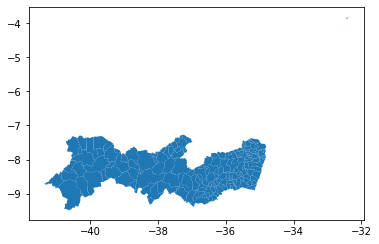

In [ ]:
br_PE.plot()